<a href="https://colab.research.google.com/github/Hannan2004/Higgs-Boson-Detection/blob/main/HiggsBosonDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Higgs Boson Detection Using Neural Networks


# This notebook demontrates the preprocessing, training and evaluation of a neural network for classifying signal and background events for Higgs boson detection


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# **1. Load and Explore the Dataset**

In [2]:
# Load the dataset
data = pd.read_csv('/content/data.csv')
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   label  lepton-pT  lepton-eta  lepton-phi  missing-energy-magnitude  \
0    1.0   0.907542    0.329147    0.359412                  1.497970   
1    1.0   0.798835    1.470639   -1.635975                  0.453773   
2    0.0   1.344385   -0.876626    0.935913                  1.992050   
3    1.0   1.105009    0.321356    1.522401                  0.882808   
4    0.0   1.595839   -0.607811    0.007075                  1.818450   

   missing-energy-phi  jet-1-pt  jet-1-eta  jet-1-phi  jet-1b-tag  ...  \
0           -0.313010  1.095531  -0.557525  -1.588230    2.173076  ...   
1            0.425629  1.104875   1.282322   1.381664    0.000000  ...   
2            0.882454  1.786066  -1.646778  -0.942383    0.000000  ...   
3           -1.205349  0.681466  -1.070464  -0.921871    0.000000  ...   
4           -0.111906  0.847550  -0.566437   1.581239    2.173076  ...   

   jet-4-eta  jet-4-phi  jet-4b-tag      m_jj     m_jjj      m_lv     m_jlv  \
0  -1.138930  -0.000

In [3]:
# Separate features and labels
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [4]:
print("\nFeatures shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (75000, 28)
Labels shape: (75000,)


In [5]:
print("\nLabels Preview:")
print(y.head())


Labels Preview:
0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: label, dtype: float64


# **2. Data Preprocessing**

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeature scaling completed.")


Feature scaling completed.


In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (60000, 28)
Testing set shape: (15000, 28)


# **3. Build the Neural Network**

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Display model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 0 (0.00 B)

# **4. Train the Model**

In [11]:
# Train the model with validation split
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5857 - loss: 0.6658 - val_accuracy: 0.6597 - val_loss: 0.6154
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6572 - loss: 0.6198 - val_accuracy: 0.6798 - val_loss: 0.5980
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6730 - loss: 0.6040 - val_accuracy: 0.6879 - val_loss: 0.5894
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6857 - loss: 0.5923 - val_accuracy: 0.7017 - val_loss: 0.5725
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6892 - loss: 0.5841 - val_accuracy: 0.7056 - val_loss: 0.5704
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6943 - loss: 0.5769 - val_accuracy: 0.7032 - val_loss: 0.5612
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7018 - loss: 0.5703 - val_accuracy: 0.7092 - val_loss: 0.5547
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7002 - loss: 0.5650 - 

# **5. Visualize Training Performance**

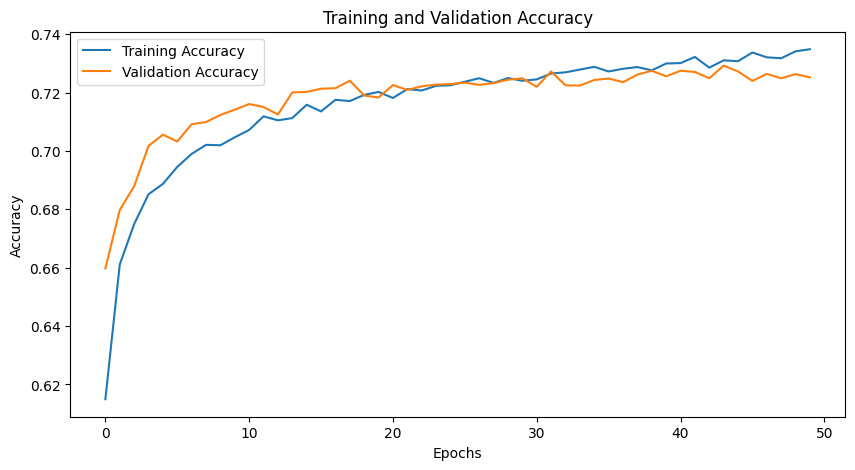

In [12]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

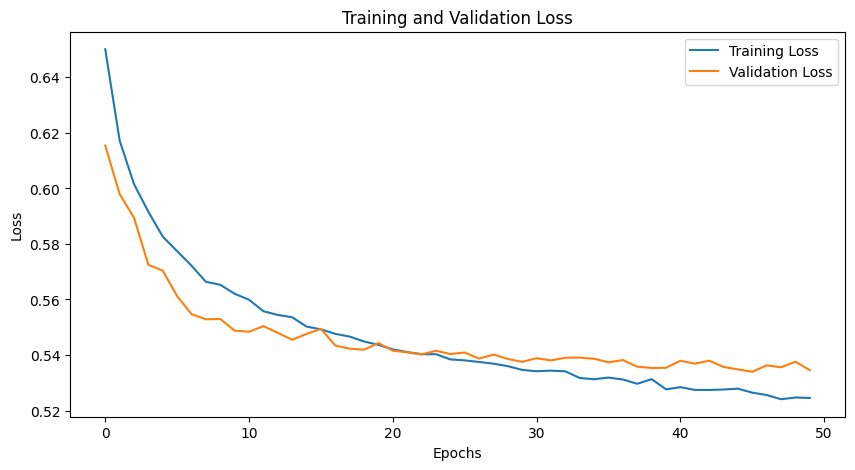

In [13]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# **6. Evaluate the Model**

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7153 - loss: 0.5512

Test Accuracy: 71.85%
Test Loss: 54.59%


# **7. Generate Predictions and Metrics**

In [15]:
# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [16]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69      7049
         1.0       0.72      0.76      0.74      7951

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



# **8. Save and Reload the Model**

In [17]:
# Save the model
model.save('higgs_boson_model.keras')
print("\nModel saved as 'higgs_boson_model.keras'.")


Model saved as 'higgs_boson_model.keras'.


In [18]:
# Reload the model
loaded_model = tf.keras.models.load_model('higgs_boson_model.keras')
print("Model reloaded successfully.")

Model reloaded successfully.


# **9. Make a Single Prediction**

In [19]:
sample_input = np.array([30.0, 0.5, -2.1, 120.0, 0.75,
                         45.0, -0.8, -1.2, 0.0,
                         60.0, 0.3, -0.9, 1.0,
                         0.0, 0.0, 0.0, 0.0,
                         0.0, 0.0, 0.0, 0.0,
                         80.0, 150.0, 200.0, 300.0,
                         400.0, 500.0, 600.0])

In [20]:
sample_input_scaled = scaler.transform(sample_input.reshape(1, -1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
# Make a prediction
prediction = loaded_model.predict(sample_input_scaled)
predicted_label = (prediction > 0.5).astype("int32")[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


In [22]:
if predicted_label == 1:
    print("Prediction: Signal")
else:
    print("Prediction: Background")

Prediction: Background
